In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv("../dataset/HousingData.csv")

# Data Preparation

In [11]:
display(df.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [13]:
display(df.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [15]:
display(df.describe())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


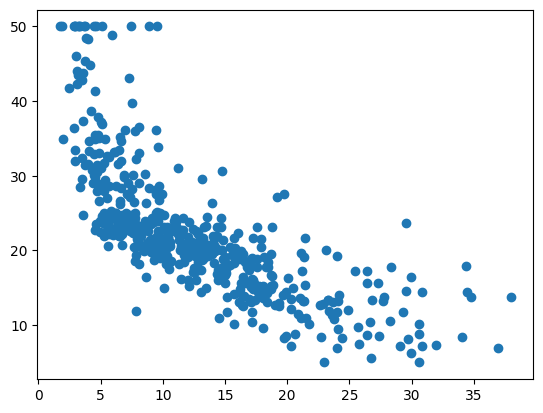

In [19]:
plt.scatter(df["LSTAT"],df["MEDV"])

plt.show()

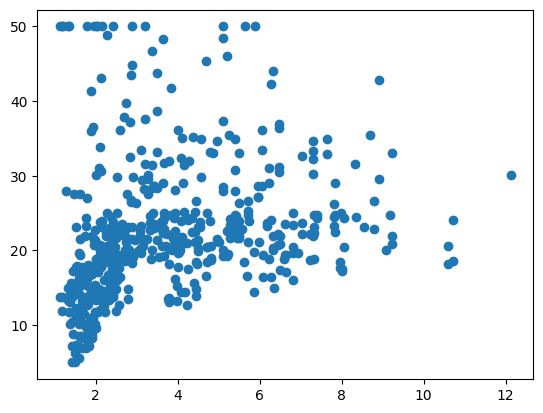

In [20]:
plt.scatter(df["DIS"],df["MEDV"])
plt.show()

In [21]:
selected_colomns = ["MEDV","PTRATIO","B","LSTAT","DIS","RM","CRIM"]
boston_subset = df[selected_colomns]

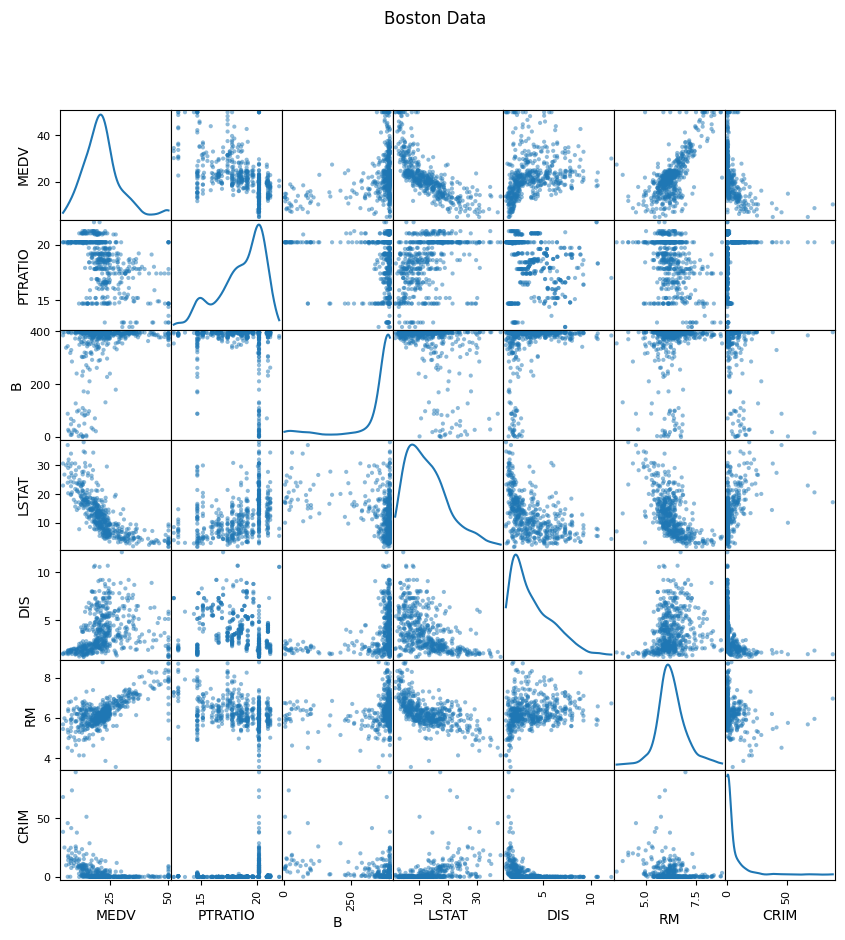

In [32]:
scatter_matrix(boston_subset,  figsize=(10,10), diagonal="kde")
plt.suptitle("Boston Data")
plt.show()

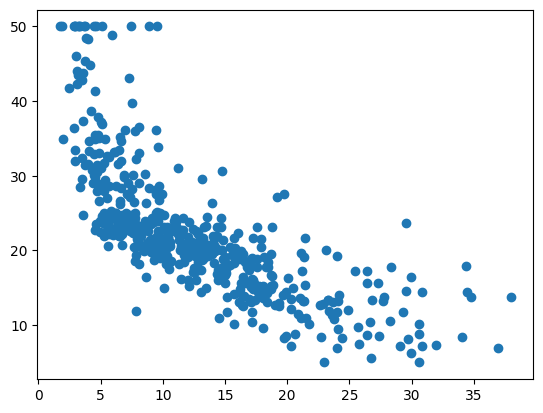

In [41]:
plt.scatter(df["LSTAT"], df["MEDV"] )
plt.show()

# Data Cleaning

In [75]:
print(df[["LSTAT","MEDV"]].isnull().sum())

LSTAT    20
MEDV      0
dtype: int64


In [77]:
df['LSTAT'].fillna(df['LSTAT'].mean(), inplace=True)
print(df[["LSTAT", "MEDV"]].isnull().sum())

LSTAT    0
MEDV     0
dtype: int64


In [37]:
print(df.duplicated().sum())

0


# analisis machine learning

In [84]:
X = df['LSTAT']# Ganti 'label_column' dengan nama kolom label Anda
y = df['MEDV']

# Bagi dataset menjadi 75% untuk pelatihan dan 25% untuk pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 75% data untuk pelatihan
print("Ukuran dataset pelatihan:", X_train.shape[0])

# 25% data untuk pengujian
print("Ukuran dataset pengujian:", X_test.shape[0])


Ukuran dataset pelatihan: 379
Ukuran dataset pengujian: 127


In [121]:
def linearRegresion(x,y):
    x = np.vstack((np.tile(1,len(x)), x)).T
    
    alpha = 0.006
    iters = 100000
    costHistory = []
    theta = np.zeros(2)
    
    for i in range(iters):
        
        # melakukan prediksi dengan theta
        prediksi = x @ theta
        
        # membandingkan prediksi dengan nilai asli
        error = prediksi - y
        
        # menghitung gradient dari cost function terhadap setiap parameter theta
        delta = x.T @ error / len(y)
        
        # memperbarui theta
        theta = theta - alpha * delta

              
    return theta

In [119]:
def predict(theta, x):
    return theta[0] + theta[1] * x

In [122]:
prediksi = linearRegresion(np.array(X_train.values),np.array(y_train.values) )

In [123]:
print(f"nilai theta : {prediksi}")

nilai theta : [35.14105394 -0.9750326 ]


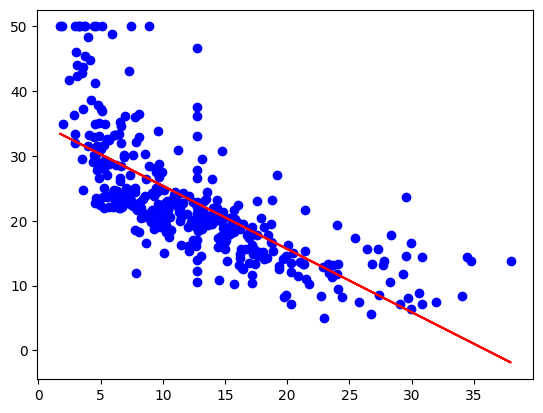

In [124]:
plt.scatter(X_train, y_train, color="blue")
plt.plot(X_train, predict(prediksi, X_train), color="red")
plt.show()

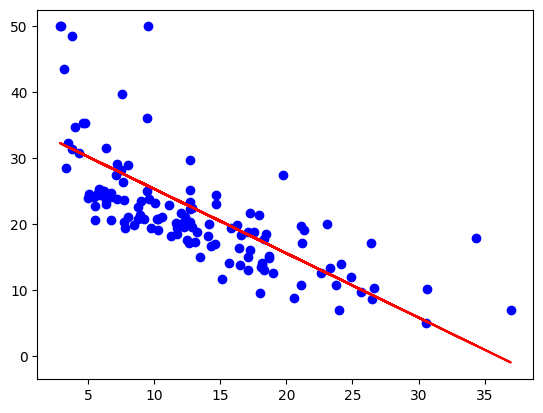

In [109]:
plt.scatter(X_test,y_test, color="blue")
plt.plot(X_test, predict(prediksi, X_test), color="red")
plt.show()